In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import plotly.express as ex
#import plotly.graph_objects as g

In [4]:
df = pd.read_csv("C:\\Users\Ankush Niwane\Downloads\machine_larning program\datasets\BankChurners.csv")


In [5]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [6]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [9]:
df['Income_Category'] = df['Income_Category'].replace(
    {
        'Unknown': 0, 'Less than $40K': 1, 
        '$40K - $60K': 2, '$60K - $80K': 3, 
        '$80K - $120K': 4, '$120K +': 5
    }
)
df['Attrition_Flag'] = df['Attrition_Flag'].replace(
    {
        'Attrited Customer': 0, 'Existing Customer': 1
    }
)
df['Gender'] = df['Gender'].replace(
    {
        'F': 0, 'M': 1
    }
)
df['Education_Level'] = df['Education_Level'].replace(
    {
        'Unknown': 0, 'Uneducated': 1, 'High School': 2,
        'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6
    }
)
df['Marital_Status'] = df['Marital_Status'].replace(
    {
        'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3
    }
)
df['Card_Category'] = df['Card_Category'].replace(
    {
        'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3
    }
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
from sklearn.model_selection import train_test_split
x = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

xx_train, yy_train = sm.fit_resample(x_train, y_train)
df_train = pd.concat([pd.DataFrame(yy_train), pd.DataFrame(xx_train)], axis=1)

XX, YY = sm.fit_resample(df.drop('Attrition_Flag', axis=1), df['Attrition_Flag'])
df_os = pd.concat([pd.DataFrame(YY), pd.DataFrame(XX)], axis=1)

In [13]:
print('Before SMOTE:') 
print(df['Attrition_Flag'].value_counts(), '\n')
print('After SMOTE:')
print(df_os['Attrition_Flag'].value_counts())

Before SMOTE:
1    8500
0    1627
Name: Attrition_Flag, dtype: int64 

After SMOTE:
1    8500
0    8500
Name: Attrition_Flag, dtype: int64


In [14]:
plt.rcParams["figure.figsize"] = (12,5)

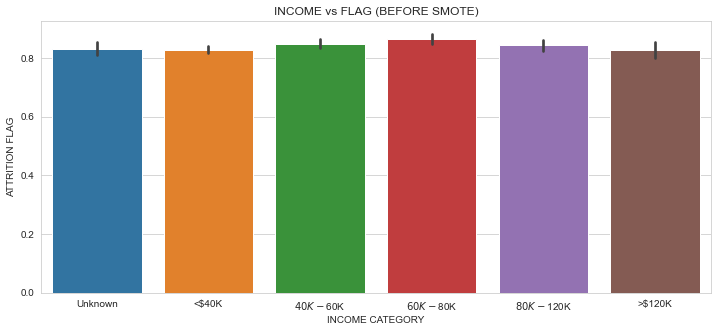

In [15]:
sns.set_style('whitegrid')
x_labels = ['Unknown', '<$40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '>$120K']
sns.barplot(x='Income_Category', y='Attrition_Flag', data=df)
plt.ylabel('ATTRITION FLAG')
plt.xlabel('INCOME CATEGORY')
plt.xticks([0, 1, 2, 3, 4, 5], x_labels)
plt.title('INCOME vs FLAG (BEFORE SMOTE)')
plt.show()

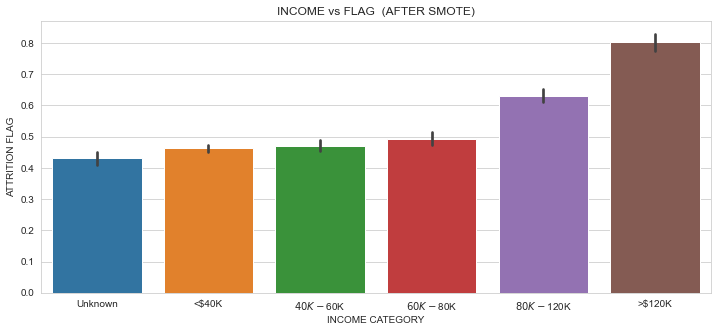

In [16]:
sns.set_style('whitegrid')
x_labels = ['Unknown', '<$40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '>$120K']
sns.barplot(x='Income_Category', y='Attrition_Flag', data=df_os)
plt.ylabel('ATTRITION FLAG')
plt.xlabel('INCOME CATEGORY')
plt.xticks([0, 1, 2, 3, 4, 5], x_labels)
plt.title('INCOME vs FLAG  (AFTER SMOTE)')
plt.show()

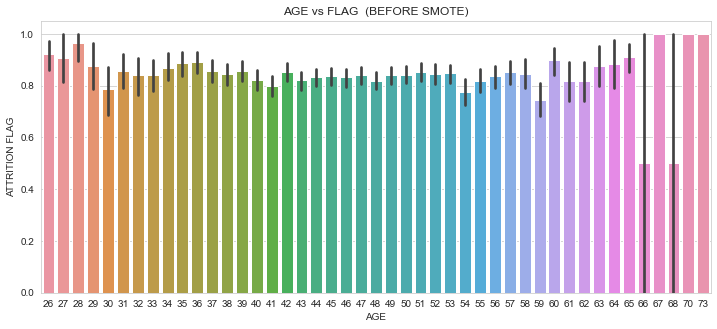

In [17]:
sns.set_style('whitegrid')
sns.barplot(x='Customer_Age', y='Attrition_Flag', data=df)
plt.ylabel('ATTRITION FLAG')
plt.xlabel('AGE')
plt.title('AGE vs FLAG  (BEFORE SMOTE)')
plt.show()

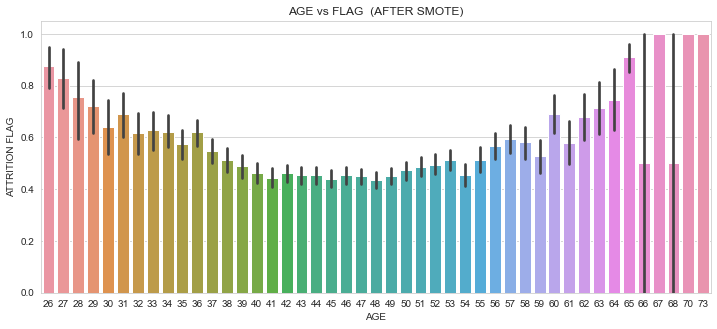

In [18]:
sns.set_style('whitegrid')
sns.barplot(x='Customer_Age', y='Attrition_Flag', data=df_os)
plt.ylabel('ATTRITION FLAG')
plt.xlabel('AGE')
plt.title('AGE vs FLAG  (AFTER SMOTE)')
plt.show()

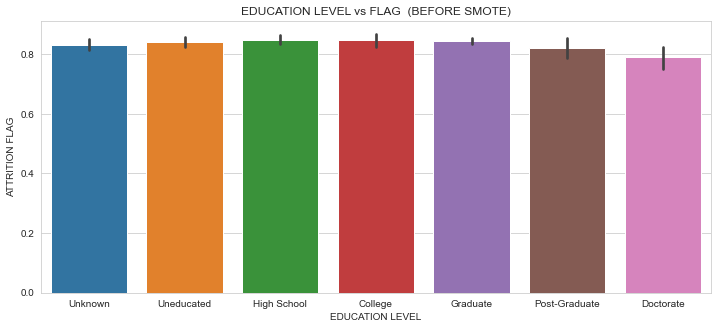

In [19]:
sns.set_style('whitegrid')
x_labels = ['Unknown', 'Uneducated', 'High School', 
            'College', 'Graduate', 'Post-Graduate', 'Doctorate']
sns.barplot(x='Education_Level', y='Attrition_Flag', data=df)
plt.ylabel('ATTRITION FLAG')
plt.xlabel('EDUCATION LEVEL')
plt.xticks([0, 1, 2, 3, 4, 5, 6], x_labels)
plt.title('EDUCATION LEVEL vs FLAG  (BEFORE SMOTE)')
plt.show()

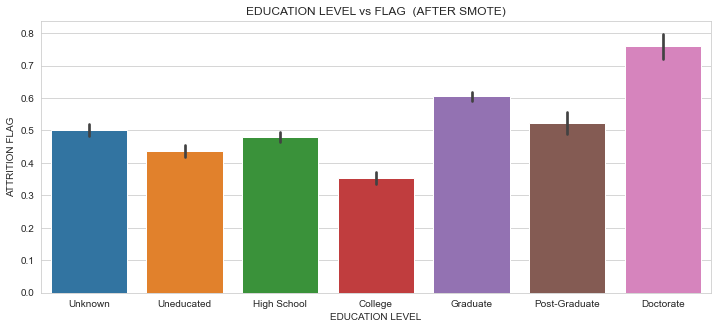

In [20]:
sns.set_style('whitegrid')
x_labels = ['Unknown', 'Uneducated', 'High School', 
            'College', 'Graduate', 'Post-Graduate', 'Doctorate']
sns.barplot(x='Education_Level', y='Attrition_Flag', data=df_os)
plt.ylabel('ATTRITION FLAG')
plt.xlabel('EDUCATION LEVEL')
plt.xticks([0, 1, 2, 3, 4, 5, 6], x_labels)
plt.title('EDUCATION LEVEL vs FLAG  (AFTER SMOTE)')
plt.show()

TypeError: set_ticks() takes 2 positional arguments but 3 were given

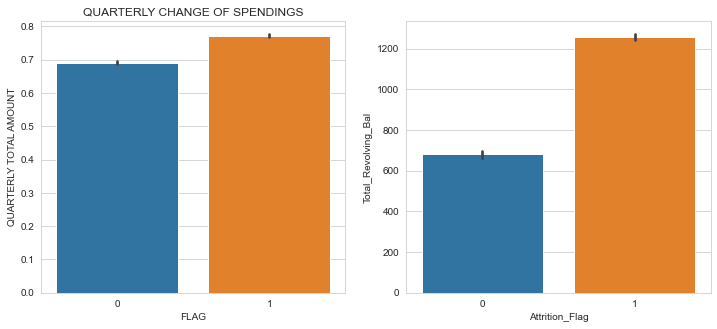

In [21]:
f, axes = plt.subplots(1, 2)
sns.barplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=df_os, ax=axes[0])
sns.barplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df_os, ax=axes[1])
axes[0].set_title('QUARTERLY CHANGE OF SPENDINGS')
axes[0].set_ylabel('QUARTERLY TOTAL AMOUNT')
axes[0].set_xlabel('FLAG')
axes[0].set_xticks([0, 1], ['Attrited Customer', 'Existing Customer'])
axes[1].set_title('TOTAL REVOLVING BALANCE')
axes[1].set_ylabel('REVOLVING BALANCE')
axes[1].set_xlabel('FLAG')
axes[1].set_xticks([0, 1], ['Attrited Customer', 'Existing Customer'])
plt.show()

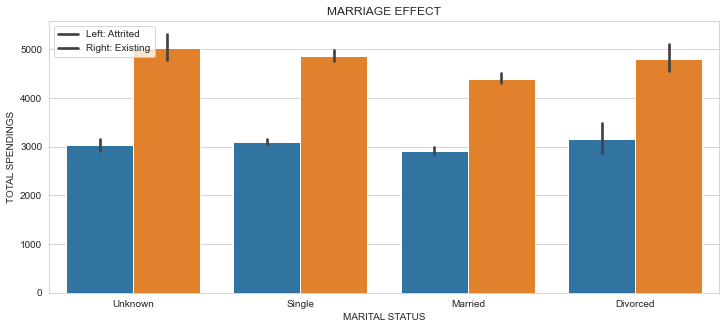

In [22]:
sns.barplot(x="Marital_Status", y="Total_Trans_Amt", hue='Attrition_Flag', data=df_os)
plt.xticks([0, 1, 2, 3], ['Unknown', 'Single', 'Married', 'Divorced'])
plt.legend(labels=['Left: Attrited', 'Right: Existing'])
plt.xlabel('MARITAL STATUS')
plt.ylabel('TOTAL SPENDINGS')
plt.title('MARRIAGE EFFECT')
plt.show()

In [23]:
labels = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_os['Education_Level'])])
fig.show()

NameError: name 'go' is not defined

ValueError: 'label' must be of length 'x'

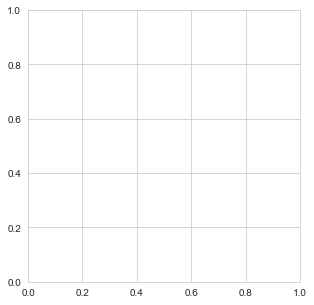

In [24]:
labels = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plt.pie( df_os.Education_Level,
    explode=None,
    labels=labels,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    
    normalize=None,
    data=None,)
plt.show()

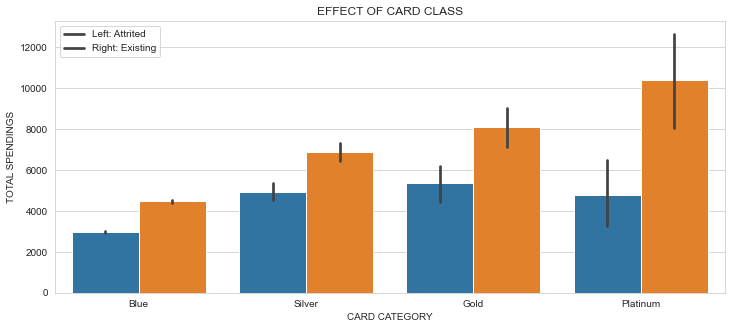

In [25]:
sns.barplot(x="Card_Category", y="Total_Trans_Amt", hue='Attrition_Flag', data=df_os)
plt.xticks([0, 1, 2, 3], ['Blue', 'Silver', 'Gold', 'Platinum'])
plt.legend(labels=['Left: Attrited', 'Right: Existing'])
plt.xlabel('CARD CATEGORY')
plt.ylabel('TOTAL SPENDINGS'),
plt.title('EFFECT OF CARD CLASS')
plt.show()

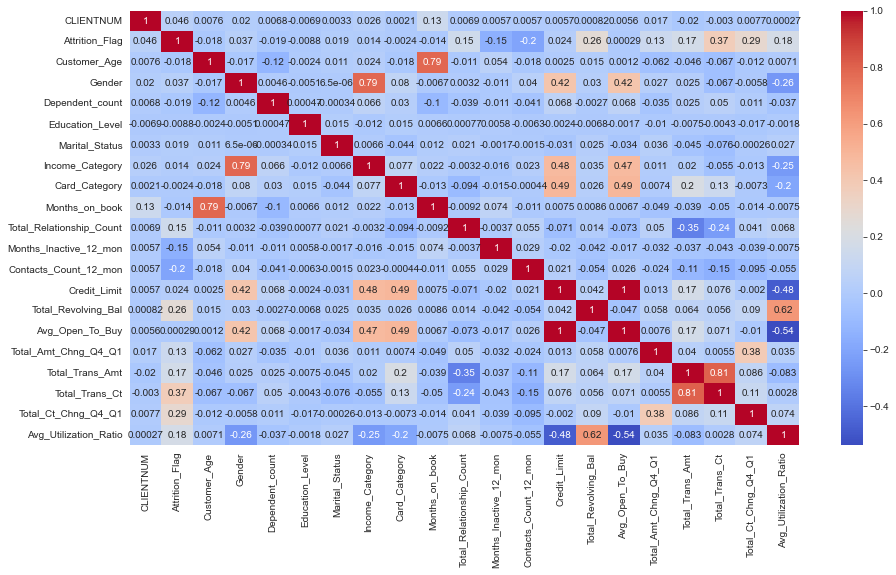

In [26]:
corr = df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [27]:
corr[abs(corr['Attrition_Flag']) > 0.11].index

Index(['Attrition_Flag', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [28]:
df_train = df_train[['Attrition_Flag', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13602 entries, 0 to 13601
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            13602 non-null  int64  
 1   Total_Relationship_Count  13602 non-null  int64  
 2   Months_Inactive_12_mon    13602 non-null  int64  
 3   Contacts_Count_12_mon     13602 non-null  int64  
 4   Total_Revolving_Bal       13602 non-null  int64  
 5   Total_Amt_Chng_Q4_Q1      13602 non-null  float64
 6   Total_Trans_Amt           13602 non-null  int64  
 7   Total_Trans_Ct            13602 non-null  int64  
 8   Total_Ct_Chng_Q4_Q1       13602 non-null  float64
 9   Avg_Utilization_Ratio     13602 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.0 MB


In [30]:
x_test = x_test[['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [31]:
from sklearn.metrics import classification_report

In [32]:
X = df_train.drop(['Attrition_Flag'], axis=1)
Y = df_train['Attrition_Flag']

In [33]:
X.shape, x_test.shape

((13602, 9), (2026, 9))

In [34]:
Y.shape, y_test.shape

((13602,), (2026,))

In [35]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X, Y)
LR_pred = logistic.predict(x_test)
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65       327
           1       0.96      0.86      0.91      1699

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026



In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, Y)
DT_pred = tree.predict(x_test)
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       327
           1       0.97      0.93      0.95      1699

    accuracy                           0.92      2026
   macro avg       0.84      0.90      0.86      2026
weighted avg       0.93      0.92      0.92      2026



In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X, Y)
RF_pred = forest.predict(x_test)
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       327
           1       0.98      0.95      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.88      0.93      0.91      2026
weighted avg       0.95      0.95      0.95      2026



In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
a=confusion_matrix(y_test,RF_pred)
a

array([[ 300,   27],
       [  84, 1615]], dtype=int64)

In [71]:

ConfusionMatrixDisplay(a,display_labels=None)
plt.show()

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,RocCurveDisplay
accuracy_score(y_test,RF_pred)

0.9452122408687068